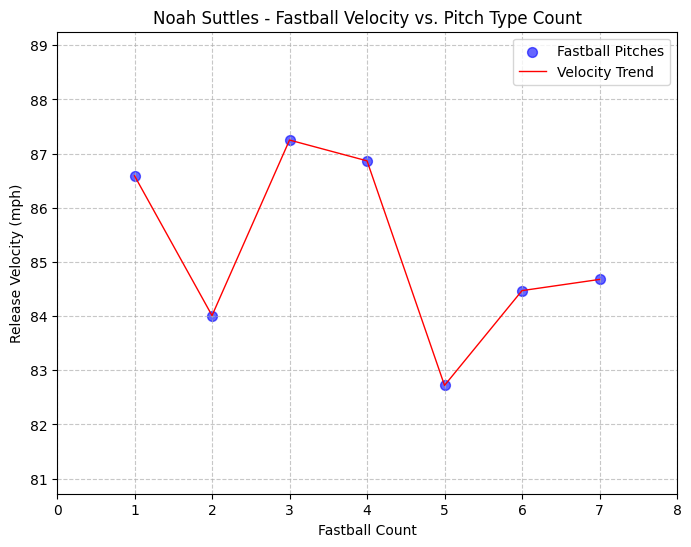

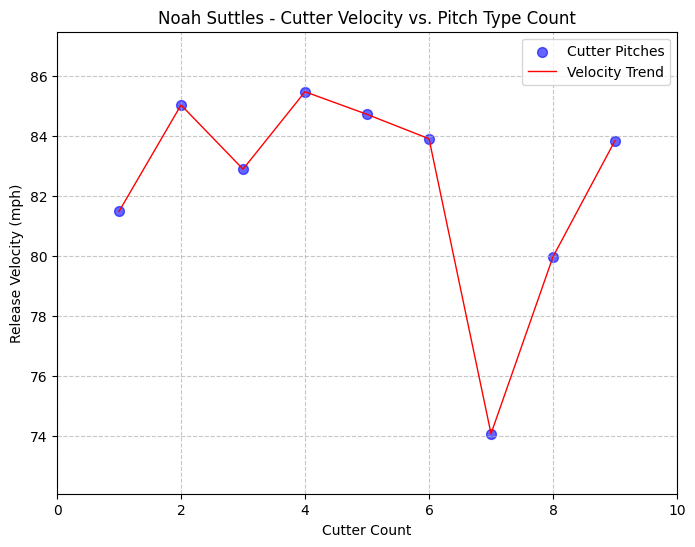

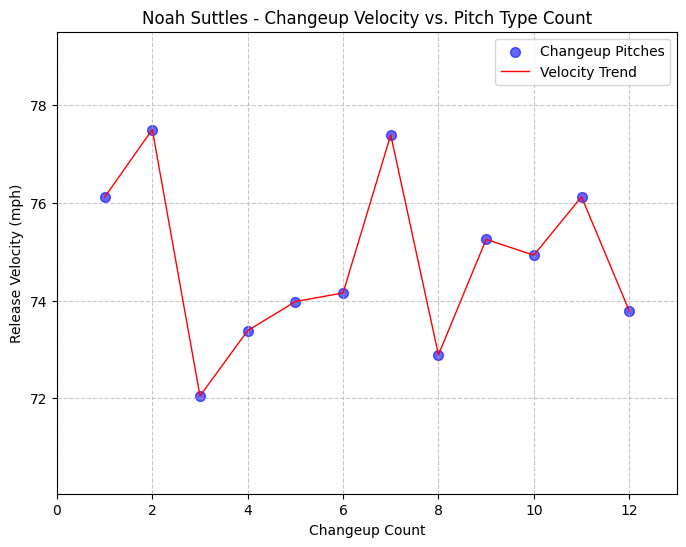

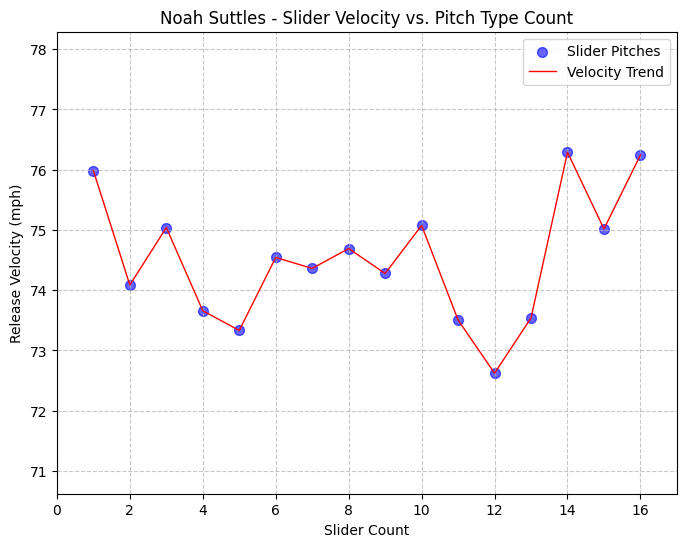

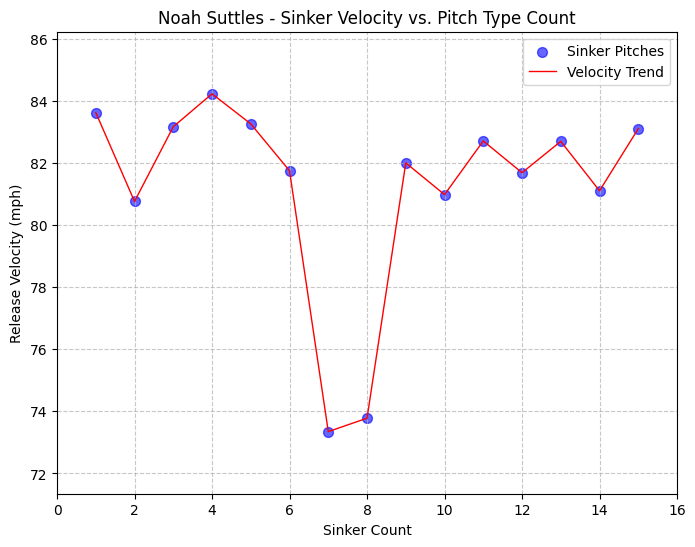

No pitches of type nan found for Noah Suttles


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pitch_velocity_with_line(pitcher_name, data_path='your_data.csv'):
    # Load the dataset
    data = pd.read_csv(data_path)
    
    # Filter data for the specified pitcher
    pitcher_data = data[data['Pitcher'] == pitcher_name]
    
    if pitcher_data.empty:
        print(f"No data found for pitcher: {pitcher_name}")
        return
    
    # Get unique pitch types for this pitcher
    pitch_types = pitcher_data['TaggedPitchType'].unique()
    
    if len(pitch_types) == 0:
        print(f"No pitch types found for pitcher: {pitcher_name}")
        return
    
    # Create a figure for each pitch type
    for pitch_type in pitch_types:
        # Filter data for the current pitch type
        pitch_type_data = pitcher_data[pitcher_data['TaggedPitchType'] == pitch_type]
        
        if pitch_type_data.empty:
            print(f"No pitches of type {pitch_type} found for {pitcher_name}")
            continue
        
        # Sort data by PitchNo to maintain chronological order
        pitch_type_data = pitch_type_data.sort_values('PitchNo')
        
        # Create a new column for pitch type count (starting at 1)
        pitch_type_data['PitchTypeCount'] = range(1, len(pitch_type_data) + 1)
        
        # Set up the plot
        plt.figure(figsize=(8, 6))
        
        # Create scatter plot
        plt.scatter(
            pitch_type_data['PitchTypeCount'],
            pitch_type_data['RelSpeed'],
            color='blue',
            alpha=0.6,
            s=50,
            label=f'{pitch_type} Pitches'
        )
        
        # Add line connecting the points
        plt.plot(
            pitch_type_data['PitchTypeCount'],
            pitch_type_data['RelSpeed'],
            color='red',
            linestyle='-',
            linewidth=1,
            label='Velocity Trend'
        )
        
        # Set plot title and labels
        plt.title(f'{pitcher_name} - {pitch_type} Velocity vs. Pitch Type Count')
        plt.xlabel(f'{pitch_type} Count')
        plt.ylabel('Release Velocity (mph)')
        
        # Add legend
        plt.legend()
        
        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Adjust axis limits for better visualization
        plt.xlim(0, max(pitch_type_data['PitchTypeCount']) + 1)
        plt.ylim(min(pitch_type_data['RelSpeed']) - 2, max(pitch_type_data['RelSpeed']) + 2)
        
        # Save the plot
        plt.savefig(f'velocity_holding/{pitcher_name}_{pitch_type}_velocity_with_line.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

# Example usage
if __name__ == "__main__":
    # Replace 'your_data.csv' with the actual path to your dataset
    data_path = 'modified_yakkertech_file.csv'
    pitcher_name = "Noah Suttles"  # Replace with desired pitcher name
    plot_pitch_velocity_with_line(pitcher_name, data_path)